NAME: HITARTH BHATT SAP-ID: 60009220209 BATCH: D1-2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [ ]:
X,y = make_classification(n_features = 4,n_classes=2)
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.1)

In [ ]:
def standardize(X_tr):
  for i in range(np.shape(X_tr)[1]):
   X_tr[:,i] = (X_tr[:,i] - np.mean(X_tr[:,i]))/np.std(X_tr[:,i])
standardize(X_tr)
standardize(X_te)

The standardize function rescales each feature in the dataset X_tr to have a mean of 0 and a standard deviation of 1. It iterates over each feature, computes its mean and standard deviation, and applies the standardization formula to each element of that feature. This process is applied in place, modifying the original dataset. The function is then used to standardize both training (X_tr) and testing datasets (X_te), ensuring they are on the same scale for machine learning models.

In [ ]:
import numpy as np

class LogisticRegression:
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def initialize(self, X):
        weights = np.zeros((np.shape(X)[1] + 1, 1))
        X = np.c_[np.ones((np.shape(X)[0], 1)), X]
        return weights, X

    def cost(self, X, y, theta):
        z = np.dot(X, theta)
        cost0 = y.T.dot(np.log(self.sigmoid(z)))
        cost1 = (1 - y).T.dot(np.log(1 - self.sigmoid(z)))
        cost = -((cost1 + cost0)) / len(y)
        return cost

    def fit(self, X, y, alpha=0.001, iter=400):
        weights, X = self.initialize(X)
        cost_list = np.zeros(iter,)
        for i in range(iter):
            weights -= alpha * np.dot(X.T, self.sigmoid(np.dot(X, weights)) - np.reshape(y, (len(y), 1)))
            cost_list[i] = self.cost(X, y, weights)
        self.weights = weights
        return cost_list

    def predict(self, X):
        z = np.dot(self.initialize(X)[1], self.weights)
        return np.where(self.sigmoid(z) > 0.5, 1, 0)


Implementing Logisitic Regression from scratch

In [ ]:
reg=LogisticRegression()
reg.fit(X_tr,y_tr)
y_pred=reg.predict(X_te)
from sklearn.metrics import f1_score
print(f1_score(y_te,y_pred))

0.7272727272727273


<ipython-input-4-be6b2343be7a>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost_list[i] = self.cost(X, y, weights)


Checking the F1 score using the Logisitic Regression function created from scratch

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_tr, y_tr)
y_pred=lr.predict(X_te)
print(f1_score(y_te,y_pred))

0.7272727272727273


Checking the F1 score using standard library

In [ ]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0,multi_class='auto', random_state=42)
lr.fit(X_train_std,y_train)
y_pred = lr.predict(X_test_std)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.9777777777777777


This code  performs classification on the Iris dataset using logistic regression. It divides the data into training and testing sets, standardizes the features, trains a logistic regression model with specified parameters, and evaluates its accuracy on the testing set.

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
weights,parmas = [],[]
for c in range(0,5):
  lr = LogisticRegression(C=10**c,multi_class='auto',random_state=0)
  lr.fit(X_train_std,y_train)
  weights.append(lr.coef_[1])
  parmas.append(10**c)
weights = np.array(weights)

The above code trains the Logistic Regression model by varying the value of C

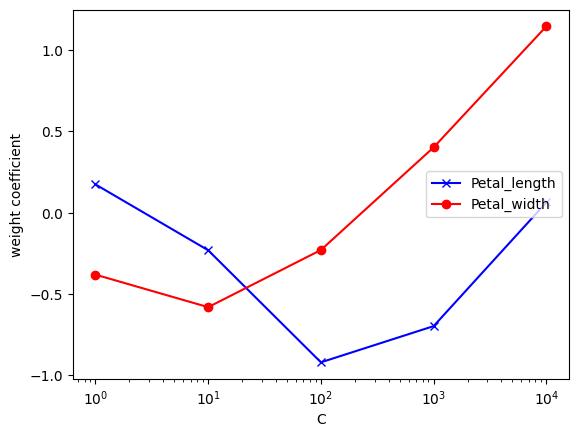

In [ ]:
plt.plot(parmas,weights[:,0],color='blue',marker='x',label='Petal_length')
plt.plot(parmas,weights[:,1],color='red',marker='o',label='Petal_width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='right')
plt.xscale('log')
plt.show()

The value of c can be log(10^1) or log(10^2)

In [ ]:
lr = LogisticRegression(C=10,random_state=0)
lr.fit(X_train_std,y_train)
y_pred = lr.predict(X_test_std)
print(accuracy_score(y_pred,y_test))

0.9777777777777777


<ipython-input-12-14d30cd8de00>:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


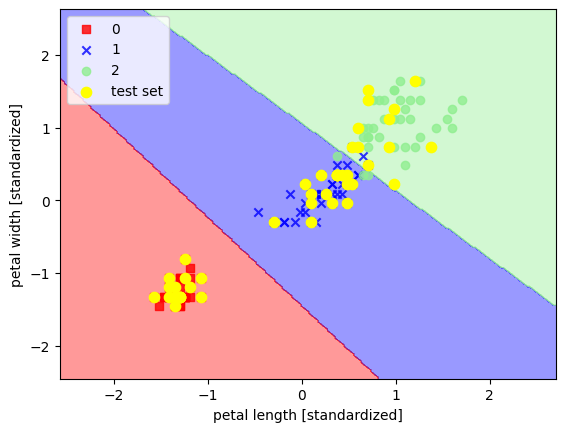

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
# setup marker generator and color map
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
# plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
  np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  # plot all samples
  X_test, y_test = X[test_idx, :], y[test_idx]
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
    alpha=0.8,
    c=cmap(idx),
    marker=markers[idx], label=cl)
  if test_idx:
    X_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(X_test[:, 0], X_test[:, 1], c='Yellow',
    alpha=1.0, linewidth=1, marker='o',
    s=55, label='test set')
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std,
                      y_combined, classifier=lr,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()


This code defines a function plot_decision_regions to visualize decision boundaries of a classifier on a 2D feature space. It utilizes matplotlib to create scatter plots of the data points and overlays decision regions based on the classifier's predictions.

The function takes the feature matrix X, target vector y, trained classifier classifier, and optional test_idx parameter to highlight test data points.

It creates a meshgrid spanning the feature space and predicts the class labels for each point on the grid using the classifier.

Decision regions are filled with colors corresponding to predicted class labels.
Scatter plots of the data points are overlaid on the decision regions.
Optionally, test data points can be highlighted separately.

Finally, labels and legends are added to the plot for clarity.

The function facilitates visual inspection of how the classifier separates different classes in the feature space, aiding in understanding its behavior and performance.